# Hill Climbing for the Travelling Sales Agent Problem

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//ericmanley/ai_map_environments/blob/tsp/notebooks/tsp_hill_climb_lab.ipynb)

This notebook shows how to use the `TravellingSalesAgentProblem` class, which will allow you to try out solutions to the Travelling Salesperson Problem: https://en.wikipedia.org/wiki/Travelling_salesman_problem

If you are running on Colab or don't have the `mapbots` module installed, you need to run this:

In [1]:
import sys

!{sys.executable} -m pip install --upgrade git+https://github.com/ericmanley/ai_map_environments.git@tsp

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/ericmanley/ai_map_environments.git (to revision tsp) to /private/var/folders/5w/7z49ydpn5b7dd32fcpnm_5r0qhzwj7/T/pip-req-build-6plwdhia
  Running command git clone --filter=blob:none --quiet https://github.com/ericmanley/ai_map_environments.git /private/var/folders/5w/7z49ydpn5b7dd32fcpnm_5r0qhzwj7/T/pip-req-build-6plwdhia
  Running command git checkout -b tsp --track origin/tsp
  Switched to a new branch 'tsp'
  Branch 'tsp' set up to track remote branch 'tsp' from 'origin'.
  Resolved https://github.com/ericmanley/ai_map_environments.git to commit 07fe011060d8930faa2ba8f6db0dc7de2838d1d3
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3 -m pip install --upgrade pip


## Creating a map

You can create an instance of the travelling sales agent problem similar to how you created `StreetSweeperWorld` instances. It allows you to select a map of a real place. It will randomly generate an origin (shown in purple) and some number of destinations specified by `num_locations`. You can seed the random generator to try experiments on the same instance.

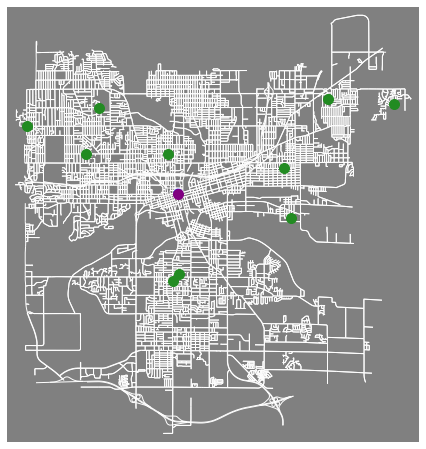

In [2]:
from mapbots import TravellingSalesAgentProblem

tsp_instance = TravellingSalesAgentProblem(place="Des Moines, Iowa, USA", num_locations=10, random_seed=4)
tsp_instance.display_map()

## Listing the destinations

The `get_destination_locations()` method will give you a list of the location ids for all of the destination locations.

In [3]:
destinations = tsp_instance.get_destination_locations()
destinations

[160870668,
 160813625,
 2359785044,
 160895351,
 160918148,
 160826598,
 160805761,
 160800024,
 160742630,
 160897602]

## Trying a TSP solution

A solution to TSP is a list of destination location ids - so the destinations list we got above is a valid one to try. You can display it on the map by passing the list to the optional `route` parameter when displaying the map.

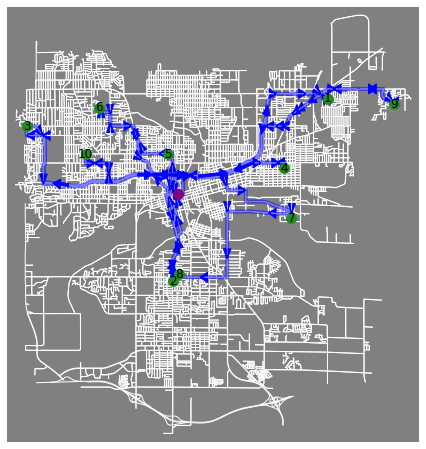

In [4]:
tsp_instance.display_map(route = destinations)

You can also calculate the total travel time with `route_travel_time()` like this:

In [5]:
route1_cost = tsp_instance.route_travel_time(route = destinations )
print(route1_cost)

7246.199999999997


## Iterating on solutions

One way to iterate on a solution is to just remove one of the items and put it somewhere else. This code makes a copy of the destinations list, removes the last item and puts it into position 4. This will yield a different solution which you can look at with the map and calculate the cost of. In this case, it appears to have improved the solution a little bit.

In [6]:
reorder_destinations = destinations[:] #making a copy
last_dest = reorder_destinations.pop()
reorder_destinations.insert(4,last_dest) #insert into a new place
reorder_destinations

[160870668,
 160813625,
 2359785044,
 160895351,
 160897602,
 160918148,
 160826598,
 160805761,
 160800024,
 160742630]

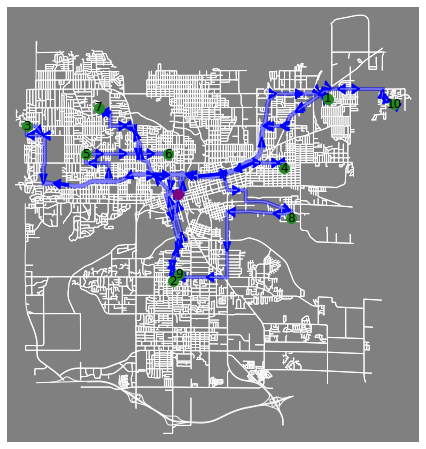

7129.199999999995


In [7]:
tsp_instance.display_map(route = reorder_destinations)
print( tsp_instance.route_travel_time(route = reorder_destinations ) )

### Exercise

Implement a hill-climbing algorithm that will continually iterate on the solution, keeping track of better solutions until no further improvements can be made.